#Links

## Day 1
https://adventofcode.com/2024/day/1``


--- Day 1: Historian Hysteria ---

The Chief Historian is always present for the big Christmas sleigh launch, but nobody has seen him in months! Last anyone heard, he was visiting locations that are historically significant to the North Pole; a group of Senior Historians has asked you to accompany them as they check the places they think he was most likely to visit.

As each location is checked, they will mark it on their list with a star. They figure the Chief Historian must be in one of the first fifty places they'll look, so in order to save Christmas, you need to help them get fifty stars on their list before Santa takes off on December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

You haven't even left yet and the group of Elvish Senior Historians has already hit a problem: their list of locations to check is currently empty. Eventually, someone decides that the best place to check first would be the Chief Historian's office.

Upon pouring into the office, everyone confirms that the Chief Historian is indeed nowhere to be found. Instead, the Elves discover an assortment of notes and lists of historically significant locations! This seems to be the planning the Chief Historian was doing before he left. Perhaps these notes can be used to determine which locations to search?

Throughout the Chief's office, the historically significant locations are listed not by name but by a unique number called the location ID. To make sure they don't miss anything, The Historians split into two groups, each searching the office and trying to create their own complete list of location IDs.

There's just one problem: by holding the two lists up side by side (your puzzle input), it quickly becomes clear that the lists aren't very similar. Maybe you can help The Historians reconcile their lists?

For example:

3   4

4   3

2   5

1   3

3   9

3   3


Maybe the lists are only off by a small amount! To find out, pair up the numbers and measure how far apart they are. Pair up the smallest number in the left list with the smallest number in the right list, then the second-smallest left number with the second-smallest right number, and so on.

Within each pair, figure out how far apart the two numbers are; you'll need to add up all of those distances. For example, if you pair up a 3 from the left list with a 7 from the right list, the distance apart is 4; if you pair up a 9 with a 3, the distance apart is 6.

In the example list above, the pairs and distances would be as follows:

- The smallest number in the left list is 1, and the smallest number in the right list is 3. The distance between them is 2.
- The second-smallest number in the left list is 2, and the second-smallest number in the right list is another 3. The distance between them is 1.
- The third-smallest number in both lists is 3, so the distance between them is 0.
- The next numbers to pair up are 3 and 4, a distance of 1.
- The fifth-smallest numbers in each list are 3 and 5, a distance of 2.
- Finally, the largest number in the left list is 4, while the largest number in the right list is 9; these are a distance 5 apart.

To find the total distance between the left list and the right list, add up the distances between all of the pairs you found. In the example above, this is 2 + 1 + 0 + 1 + 2 + 5, a total distance of 11!

Your actual left and right lists contain many location IDs. What is the total distance between your lists?

In [1]:
#library :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
#Fonctions borrowed :
#https://labex.io/fr/tutorials/python-convert-number-to-digit-list-in-python-13623
def digitize(n):
  return pd.DataFrame(list(map(int, str(n))))

In [48]:
#1 download list
list_ID = pd.read_table("input_d01.txt", header=None, names=['colA', 'colB'], sep=r"\s+")



In [49]:
list_ID.head()

,colA,colB
0,53906,14872
1,35867,86182
2,61313,43656
3,23620,85315
4,96434,90834


In [50]:
list_ID.shape

(1000, 2)

In [51]:
list_ID.iloc[0]

colA    53906
colB    14872
Name: 0, dtype: int64

In [52]:
x = list_ID.iloc[0]

In [53]:
x[0]

53906

In [73]:
digitize(x[0])

,0
0,5
1,3
2,9
3,0
4,6


In [77]:
list1 = sorted(digitize(x[0])[0])
list1

[0, 3, 5, 6, 9]

In [78]:
list2 =  sorted(digitize(x[1])[0])
list2

[1, 2, 4, 7, 8]

In [80]:
diff = [abs(a - b) for a, b in zip(list1, list2)]
diff

[1, 1, 1, 1, 1]

In [81]:
sum(diff)

5

In [103]:
#2 distance function between 2 numbers
def distance_btw_ID(x):
    #x is a list of 2 group of numbers
    # First we sort them
    list1 = sorted(digitize(x[0])[0])
    list2 =  sorted(digitize(x[1])[0])
    
    #Them we do the diff betweeneach paar of element
    diff = [abs(a - b) for a, b in zip(list1, list2)]
    
    return sum(diff)


In [90]:
distance_btw_ID(x)

5

In [93]:
res_list = []
for i in range(list_ID.shape[0]):
        x = list_ID.iloc[i]
        res =  distance_btw_ID(x)
        res_list.append(res)
        


In [97]:
res_list[0:6]

[5, 6, 10, 9, 6, 6]

In [95]:
sum(res_list)

9189

In [98]:
# Wrong  !
#Il faut comparer les colA et B pas chaque élément de chaque colonnes

In [104]:
#2 distance function between 2 numbers
def distance_btw_ID(x):
    #x is a list of 2 group of numbers
    # First we sort them
    list1 = sorted(x['colA'])
    list2 =  sorted(x['colB'])
    
    #Them we do the diff betweeneach paar of element
    diff = [abs(a - b) for a, b in zip(list1, list2)]
    
    return sum(diff)

In [102]:
distance_btw_ID(list_ID) #1873376 is the good result

1873376

--- Part Two ---
Your analysis only confirmed what everyone feared: the two lists of location IDs are indeed very different.

Or are they?

The Historians can't agree on which group made the mistakes or how to read most of the Chief's handwriting, but in the commotion you notice an interesting detail: a lot of location IDs appear in both lists! Maybe the other numbers aren't location IDs at all but rather misinterpreted handwriting.

This time, you'll need to figure out exactly how often each number from the left list appears in the right list. Calculate a total similarity score by adding up each number in the left list after multiplying it by the number of times that number appears in the right list.

Here are the same example lists again:

3   4

4   3

2   5

1   3

3   9

3   3

For these example lists, here is the process of finding the similarity score:

- The first number in the left list is 3. It appears in the right list three times, so the similarity score increases by 3 * 3 = 9.
-  The second number in the left list is 4. It appears in the right list once, so the similarity score increases by 4 * 1 = 4.
-  The third number in the left list is 2. It does not appear in the right list, so the similarity score does not increase (2 * 0 = 0).
- The fourth number, 1, also does not appear in the right list.
- The fifth number, 3, appears in the right list three times; the similarity score increases by 9.
- The last number, 3, appears in the right list three times; the similarity score again increases by 9.

So, for these example lists, the similarity score at the end of this process is 31 (9 + 4 + 0 + 0 + 9 + 9).

Once again consider your left and right lists. What is their similarity score?



In [106]:
list_ID['colA'][0]

53906

In [110]:
list(list_ID['colB']).count(list_ID['colA'][0])

0

In [113]:
def countx_in_B(x):
    return list(list_ID['colB']).count(x)

def countx_in_A(x):  #Not used here
    return list(list_ID['colA']).count(x)

In [114]:
countx_in_B(list_ID['colA'][0])

0

In [115]:
countx_in_A(list_ID['colA'][0])

1

In [116]:
res_list = []

for i in range(list_ID.shape[0]):
        x = list_ID.iloc[i][0]
        res =  countx_in_B(x) *  x
        res_list.append(res)

In [117]:
res_list[0:6]

[0, 0, 0, 0, 0, 0]

In [118]:
sum(res_list)

18997088

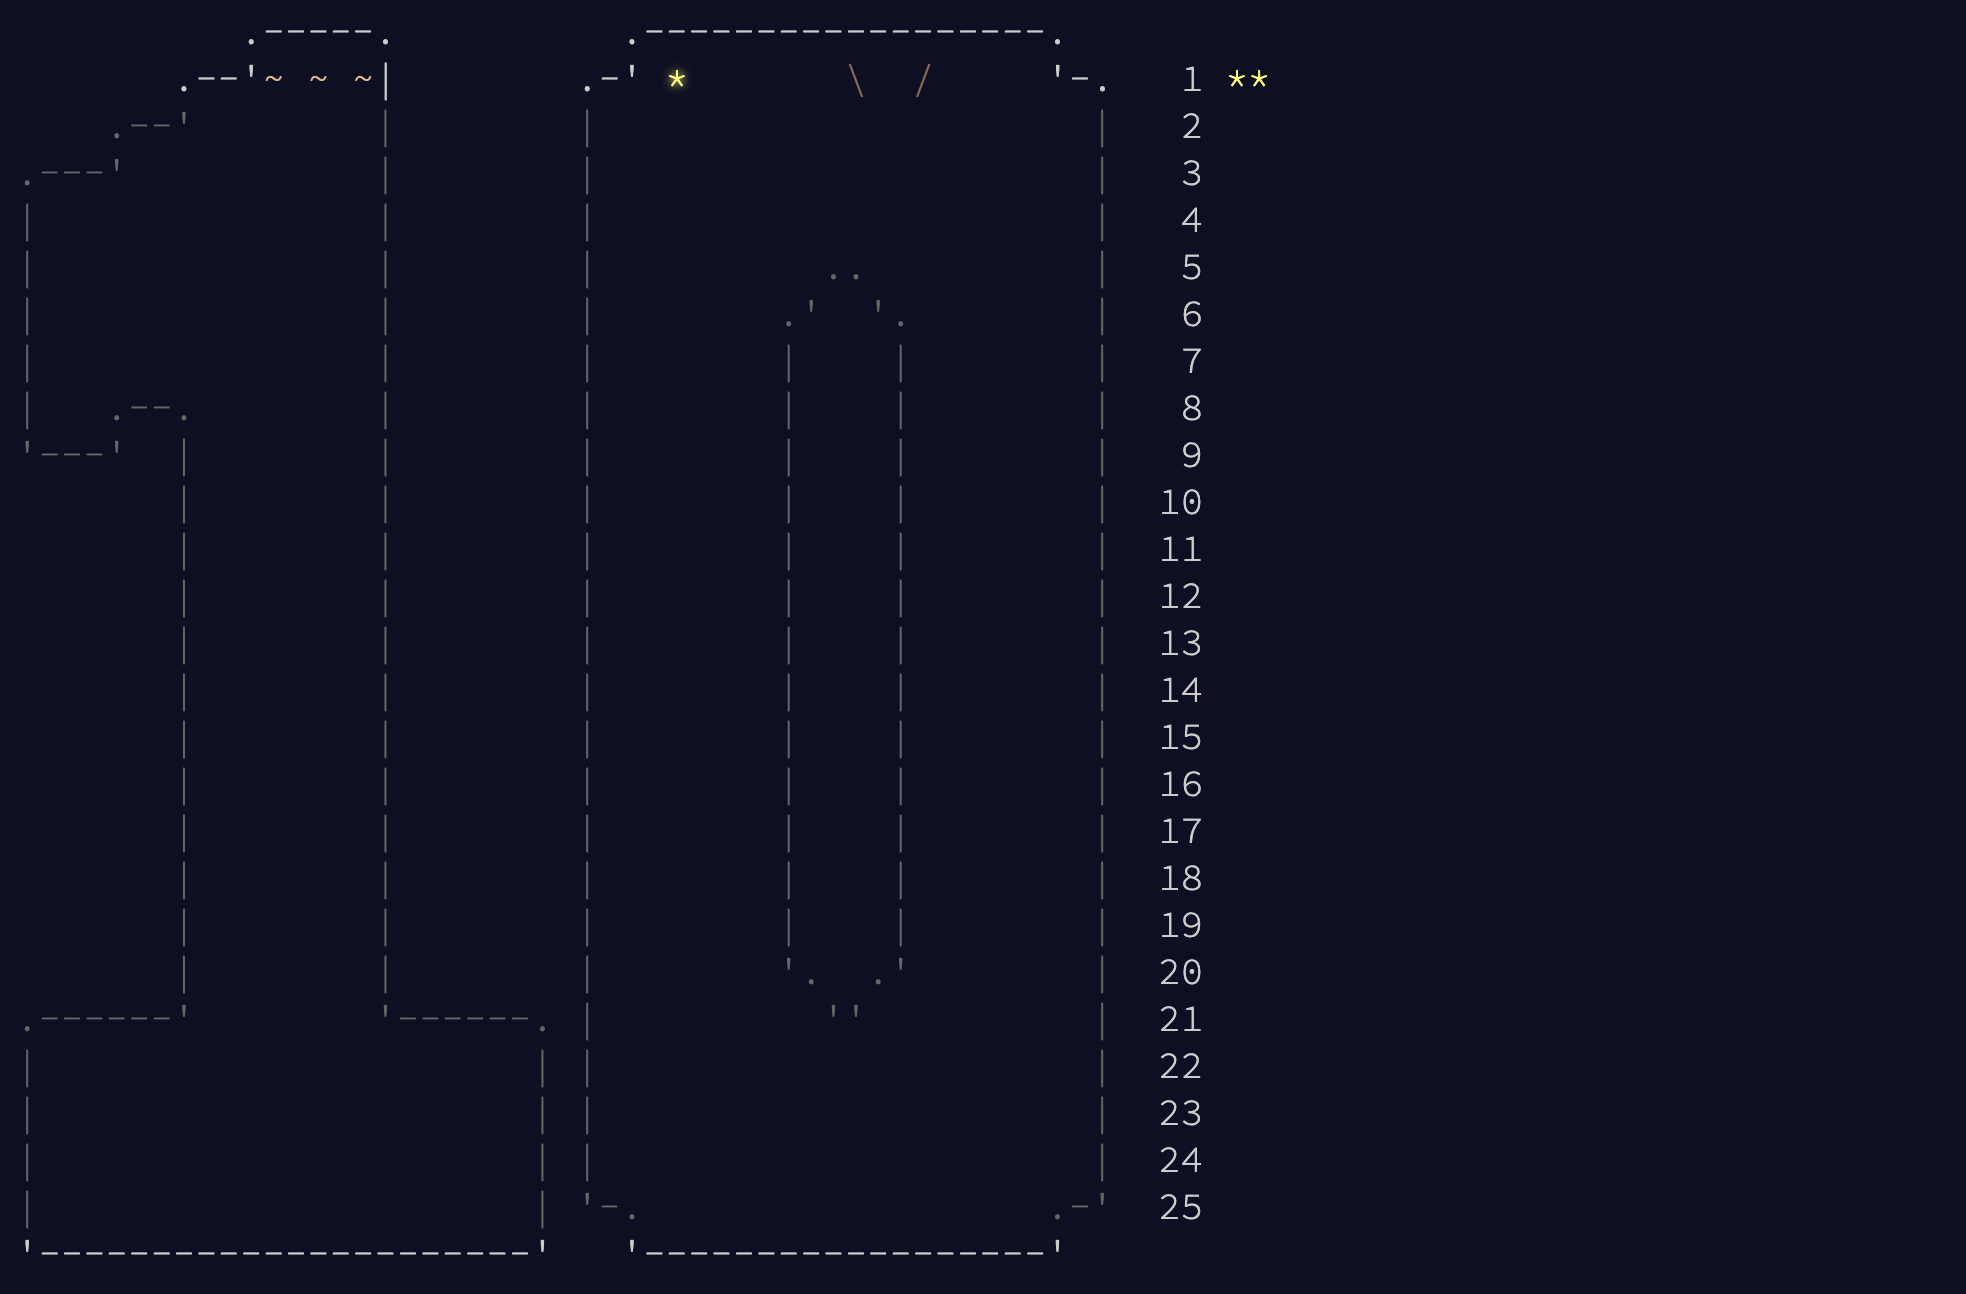